<a href="https://colab.research.google.com/github/mamathabhukya/Sale-Insights-and-forecasting-projecting-/blob/main/Sales_Insights_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title**:  "Sales Insights and Forecasting Project."

"Developed a data-driven sales insights and forecasting solution to optimize revenue generation."

**Skills Demonstrated:**



**Data Analysis**: Performed exploratory data analysis (EDA) to understand sales trends.


**SQL Database Management**: Created and managed a SQL database for storing and retrieving sales data.


**Time Series Forecasting**: Implemented time series forecasting using machine learning (Linear Regression) to predict future sales.


**Data Visualization**: Created informative visualizations (line plots) to present sales trends effectively.

**Project Impact:**

Demonstrated the ability to predict future sales, enabling better inventory management and resource allocation.


Improved decision-making by providing actionable insights through data analysis and visualization.


Contributed to revenue optimization by identifying sales trends and forecasting potential growth.

**Data Collection and SQL Database Setup:**


Collect and clean historical sales data.


Create a SQL database to store and manage the data.

In [25]:
# Example code for creating a SQLite database and loading data
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [26]:
# Load your sales data into a DataFrame (sales_df)
# Replace 'sales_data.csv' with your data source
sales_df = pd.read_csv('/content/clean_data.csv')
sales_df.head()

,order_id,order_status,customer,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category
0,3,Order Finished,Muhammed Mac Intyre,2010-10-13,6,523080,0.04,20923,Office Supplies,Storage & Organization
1,293,Order Finished,Barry French,2012-10-01,49,20246040,0.07,1417223,Office Supplies,Appliances
2,483,Order Finished,Clay Rozendal,2011-07-10,30,9931519,0.08,794522,Technology,Telephones & Communication
3,515,Order Finished,Carlos Soltero,2010-08-28,19,788540,0.08,63083,Office Supplies,Appliances
4,613,Order Finished,Carl Jackson,2011-06-17,12,187080,0.03,5612,Office Supplies,Binders & Binder Accessories


In [27]:
# Create a SQLite database and load data into it
conn = sqlite3.connect('sales_database.db')
sales_df.to_sql('sales_data', conn, if_exists='replace', index=False)

5499

In [28]:
# SQL query to retrieve monthly sales data
query = """
SELECT strftime('%Y-%m', order_date) AS Month, SUM(sales) AS MonthlySales
FROM sales_data
GROUP BY Month
ORDER BY Month;
"""
monthly_sales = pd.read_sql_query(query, conn)


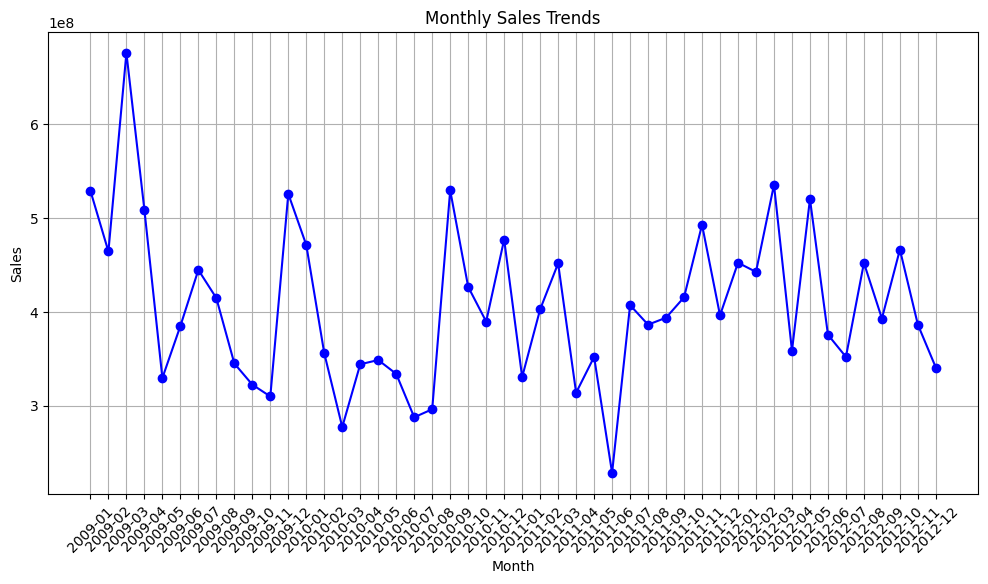

In [29]:
# Plot monthly sales trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'], monthly_sales['MonthlySales'], marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)

In [30]:
# Feature Engineering for Time Series Forecasting
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Month'])
monthly_sales.set_index('Month', inplace=True)


In [31]:
# Create lag features (e.g., previous month's sales)
monthly_sales['Prev_Month_Sales'] = monthly_sales['MonthlySales'].shift(1)

In [32]:
# Drop missing values (NaN from the first row)
monthly_sales.dropna(inplace=True)

In [33]:
# Split data into training and testing sets
X = monthly_sales[['Prev_Month_Sales']]
y = monthly_sales['MonthlySales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [35]:
future_months = 12  # Number of months to predict
last_month = monthly_sales.index[-1]
next_months = [last_month + pd.DateOffset(months=i) for i in range(1, future_months+1)]
next_month_sales = [model.predict(np.array(monthly_sales.iloc[-1]['MonthlySales']).reshape(1, -1))[0]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
for i in range(1, future_months):
    next_month_sales.append(model.predict(np.array(next_month_sales[-1]).reshape(1, -1))[0])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

In [22]:
# Add future sales to the DataFrame
future_sales = pd.DataFrame({'Month': next_months, 'MonthlySales': next_month_sales})
monthly_sales = pd.concat([monthly_sales, future_sales])


In [36]:
# Calculate R-squared value
y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print(f"R-squared (R²) value: {r_squared:.4f}")

R-squared (R²) value: -0.4746


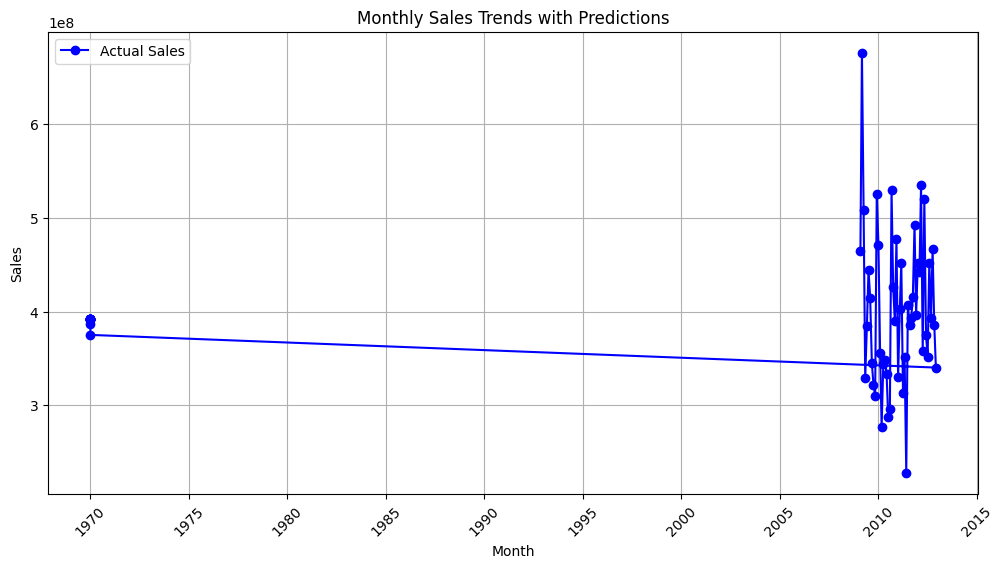

In [23]:
# Plot the original and predicted sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['MonthlySales'], marker='o', linestyle='-', color='b', label='Actual Sales')
plt.title('Monthly Sales Trends with Predictions')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.show()





